In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [48]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.size

147903

In [51]:
df.shape

(7043, 21)

In [52]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [55]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.drop('customerID', axis=1, inplace=True)

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [60]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
df.dropna(inplace = True)

In [64]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [66]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [112]:
X['avg_monthly_spend'] = X['TotalCharges'] / (X['tenure'] + 1)

In [113]:
X['is_new_customer'] = (X['tenure'] < 12).astype(int)

In [114]:
X['high_monthly_charge'] = (X['MonthlyCharges'] > X['MonthlyCharges'].median()).astype(int)

In [115]:
service_cols = [col for col in X.columns if 'Yes' in col]

X['total_services_used'] = X[service_cols].sum(axis=1)

In [116]:
X['long_term_contract'] = (
    X['Contract_One year'] + X['Contract_Two year']
)

In [117]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [118]:
X = pd.get_dummies(X, drop_first=True)

In [119]:
X.shape

(7032, 35)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
lr = LogisticRegression(max_iter = 1000)

In [129]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [130]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

In [131]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [132]:
y_prob

array([0.01922048, 0.61005015, 0.00533663, ..., 0.11170721, 0.02243937,
       0.00520787])

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, precision, recall, f1)

0.7995735607675906 0.6455696202531646 0.5454545454545454 0.591304347826087


In [134]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[921, 112],
       [170, 204]])

In [135]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)

np.float64(0.8385174275641788)

In [139]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
34,long_term_contract,0.156889
1,tenure,0.116557
3,TotalCharges,0.081259
25,Contract_Two year,0.077505
2,MonthlyCharges,0.064777
30,avg_monthly_spend,0.063478
31,is_new_customer,0.063112
10,InternetService_Fiber optic,0.053409
28,PaymentMethod_Electronic check,0.041264
24,Contract_One year,0.023332


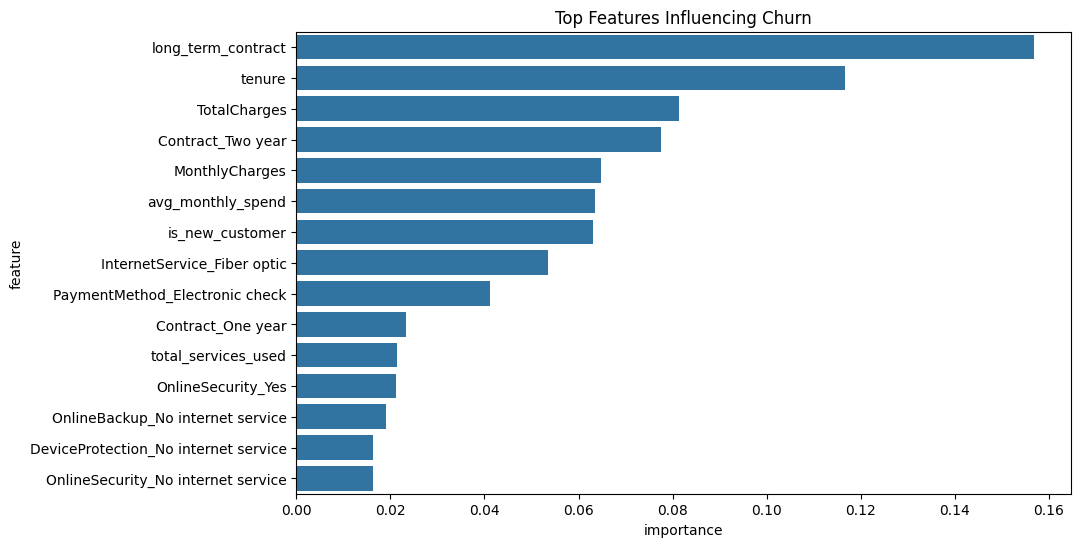

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance.head(15),
    x='importance',
    y='feature'
)
plt.title('Top Features Influencing Churn')
plt.show()

In [141]:
!pip install shap

In [142]:
import shap

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_train)

In [99]:
print(type(shap_values))
print(len(shap_values) if isinstance(shap_values, list) else shap_values.shape)

<class 'numpy.ndarray'>
(5625, 30, 2)


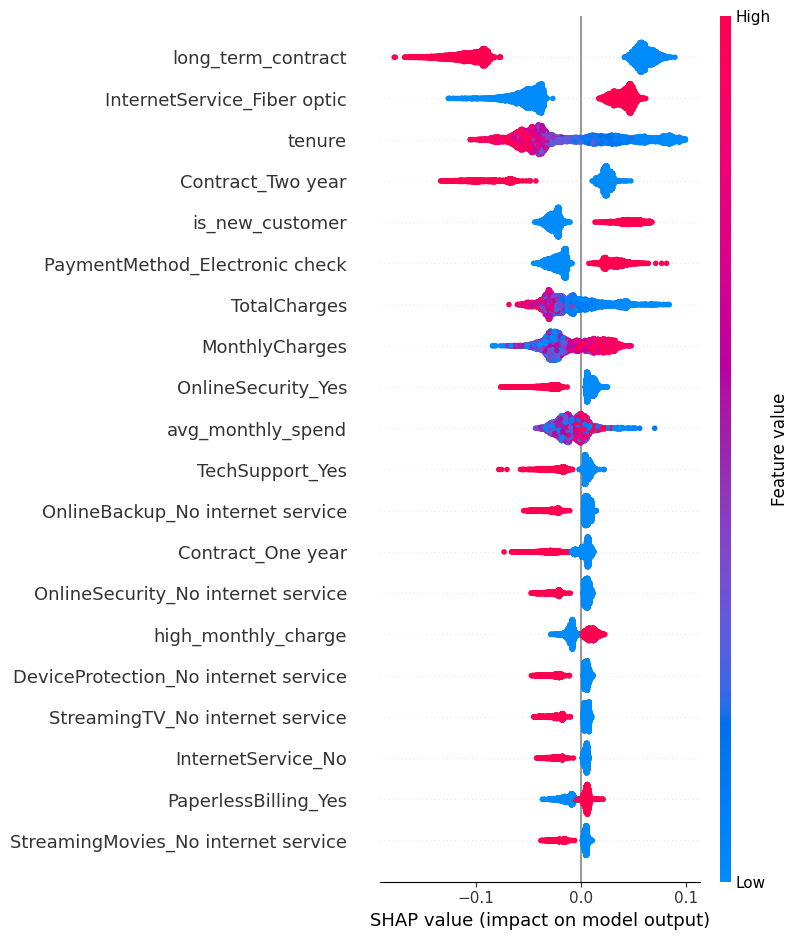

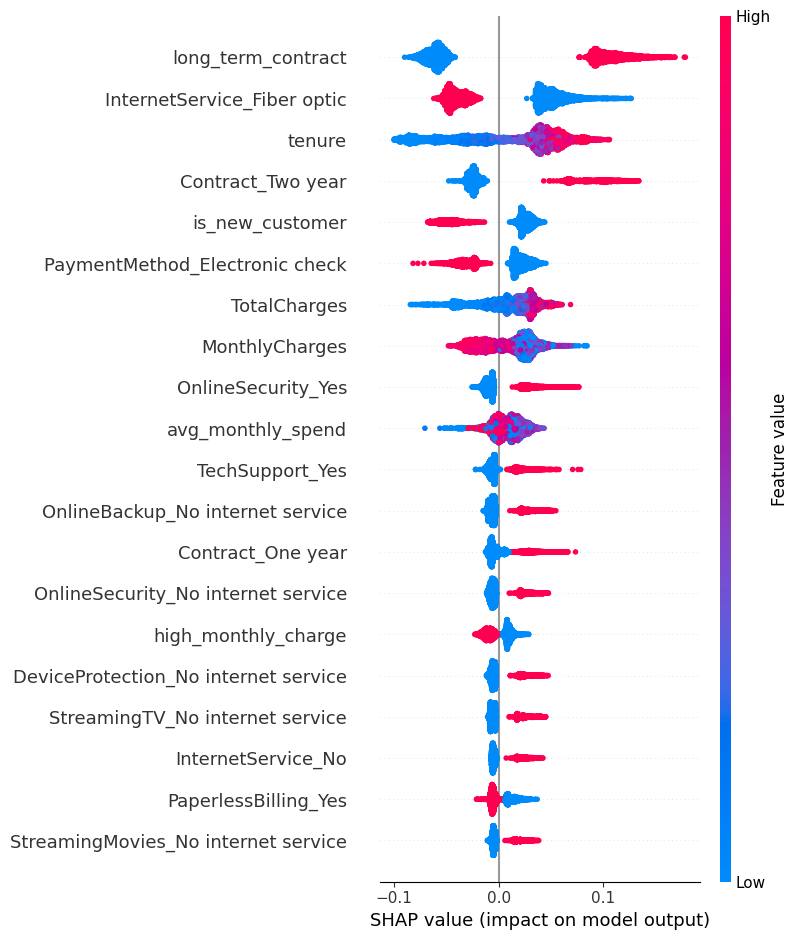

In [143]:
shap.summary_plot(shap_values[:, :, 1], X_train)

shap.summary_plot(shap_values[:, :, 0], X_train)

In [147]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

class_weights = dict(zip(classes, weights))

In [148]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight=class_weights,
    random_state=42
)

In [149]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=10,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

In [150]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=5, n_estimators=200)

In [151]:
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]

In [152]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

Accuracy: 0.7256574271499645
Precision: 0.49019607843137253
Recall: 0.8021390374331551
F1: 0.6085192697768763
ROC-AUC: 0.8381576427103448


In [166]:
y_pred_custom = (y_prob_best > 0.50).astype(int)

In [167]:
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1:", f1_score(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

Accuracy: 0.7256574271499645
Precision: 0.49019607843137253
Recall: 0.8021390374331551
F1: 0.6085192697768763
ROC-AUC: 0.8381576427103448


In [168]:
rf_improved = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,
    min_samples_leaf=4,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

rf_improved.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=400, random_state=42)

In [169]:
y_pred_new = rf_improved.predict(X_test)
y_prob_new = rf_improved.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("Precision:", precision_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))
print("F1:", f1_score(y_test, y_pred_new))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_new))

Accuracy: 0.7263681592039801
Precision: 0.4909688013136289
Recall: 0.7994652406417112
F1: 0.6083418107833164
ROC-AUC: 0.8374833696569361


In [170]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3,5,7,9],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.7, 0.85, 1],
    'colsample_bytree': [0.7, 0.85, 1],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [171]:
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.8031272210376688
Precision: 0.6622073578595318
Recall: 0.5294117647058824
F1: 0.5884101040118871
ROC-AUC: 0.8416144245254205


In [172]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack_model = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

stack_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=6,
                                                       min_samples_split=5,
                                                       n_estimators=200)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.85,
                                              device=None,
                                              early_stopping_rounds=None,
                                              ena...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [173]:
y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1:", f1_score(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_stack))

Accuracy: 0.7960199004975125
Precision: 0.637223974763407
Recall: 0.5401069518716578
F1: 0.5846599131693199
ROC-AUC: 0.8407046088698613


In [175]:
import pandas as pd

model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Stacking"],
    "Accuracy": [0.80, 0.73, 0.80, 0.79],
    "Precision": [0.64, 0.49, 0.66, 0.64],
    "Recall": [0.54, 0.80, 0.53, 0.54],
    "F1 Score": [0.59, 0.61, 0.59, 0.58],
    "ROC-AUC": [0.84, 0.84, 0.84, 0.84]
}

df_results = pd.DataFrame(model_results)
df_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.80,0.64,0.54,0.59,0.84
1,Random Forest,0.73,0.49,0.80,0.61,0.84
2,XGBoost,0.80,0.66,0.53,0.59,0.84
3,Stacking,0.79,0.64,0.54,0.58,0.84


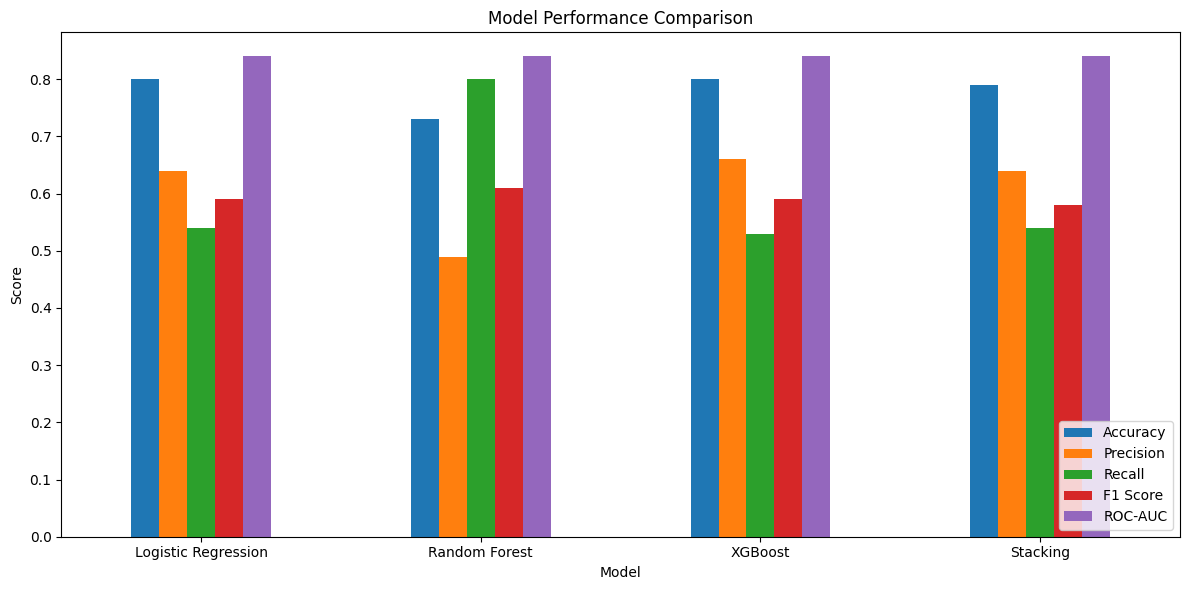

In [176]:
import matplotlib.pyplot as plt

df_results.set_index("Model").plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

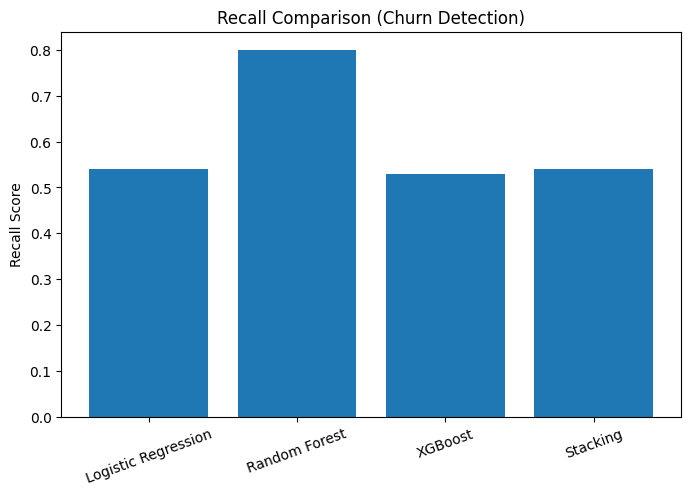

In [177]:
plt.figure(figsize=(8,5))

plt.bar(df_results["Model"], df_results["Recall"])

plt.title("Recall Comparison (Churn Detection)")
plt.ylabel("Recall Score")
plt.xticks(rotation=20)

plt.show()

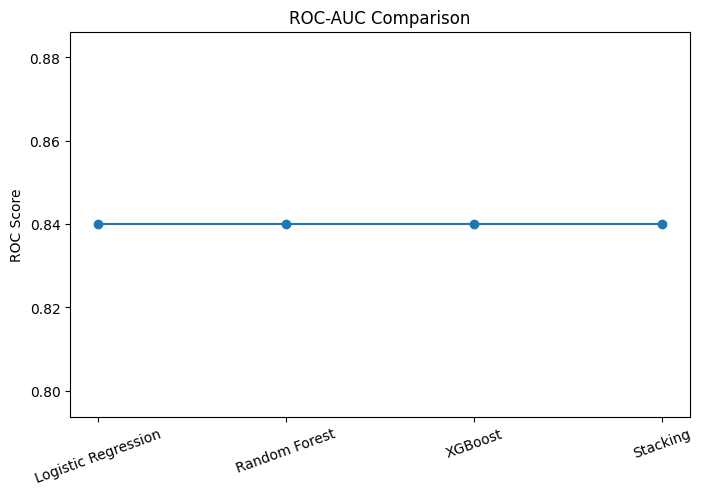

In [178]:
plt.figure(figsize=(8,5))

plt.plot(df_results["Model"], df_results["ROC-AUC"], marker='o')

plt.title("ROC-AUC Comparison")
plt.ylabel("ROC Score")
plt.xticks(rotation=20)

plt.show()

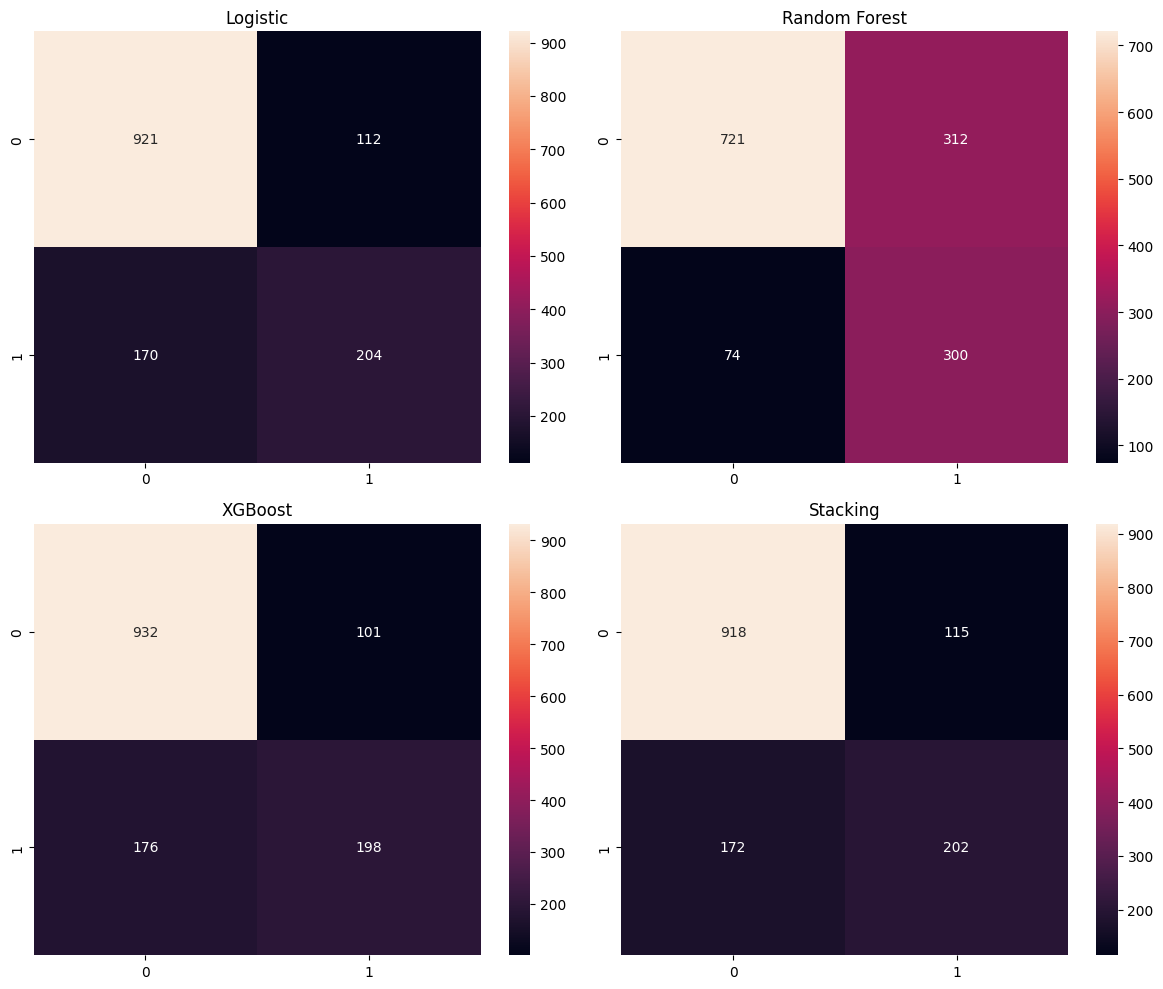

In [179]:
# confusion matrix
models = {
    "Logistic": lr,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking": stack_model
}

plt.figure(figsize=(12,10))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2,2,i+1)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(name)

plt.tight_layout()
plt.show()

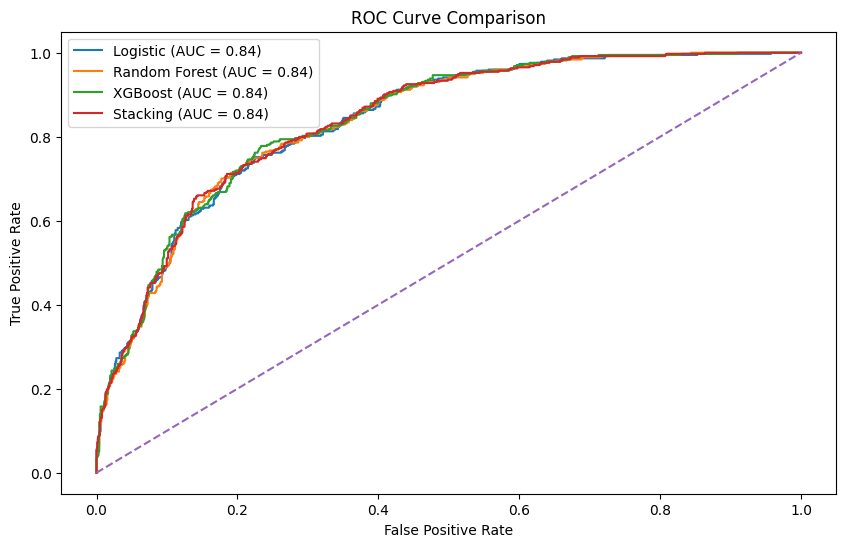

In [181]:
plt.figure(figsize=(10,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


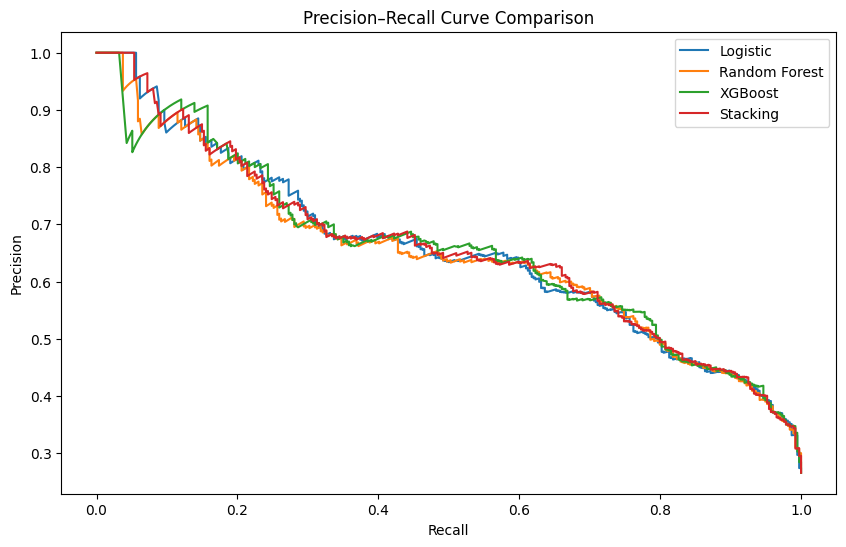

In [182]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=name)

plt.title("Precision–Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [183]:
import joblib

joblib.dump(best_rf, "churn_model.pkl")
joblib.dump(X_train.columns, "model_columns.pkl")

['model_columns.pkl']

In [185]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ("model", best_rf)
])

joblib.dump(pipeline, "full_pipeline.pkl")

print("Pipeline saved successfully")


Pipeline saved successfully
